# Task 1 - Finding Best Parameters

First we will experiment with populations, taking on values starting from 10 to 100, in steps of 10. The values of the other parameters are:
* mutation rate = 0.5
* mutation strength = 1
* crossover rate = 0.5
* Number of Generations = 10

In [2]:
from genetic_algorithm import GeneticAlgorithm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

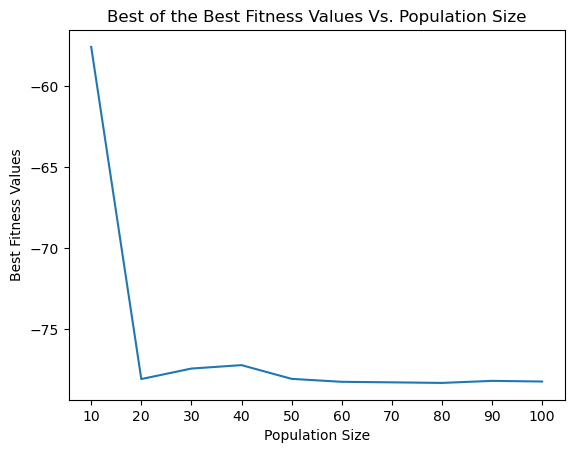

In [3]:
ga = GeneticAlgorithm(
        population_size=10,
        mutation_rate=0.5,
        mutation_strength=1,
        crossover_rate=0.5,
        num_generations=10,
)
pop_experiments = np.zeros((10, 3))
for i in range(0, 10):
    ga.population_size = (i+1) * 10
    best_solutions, best_fitness_values, average_fitness_values = ga.evolve(seed=100)
    pop_experiments[i][0] = ga.population_size
    pop_experiments[i][1] = best_fitness_values.min()
    pop_experiments[i][2] = average_fitness_values.mean()

plt.plot(pop_experiments[:, 0], pop_experiments[:, 1])
plt.title("Best of the Best Fitness Values Vs. Population Size")
plt.xlabel("Population Size")
plt.ylabel("Best Fitness Values")
plt.xticks(pop_experiments[:, 0])
plt.show()

Let's explore how the population size affects the averages

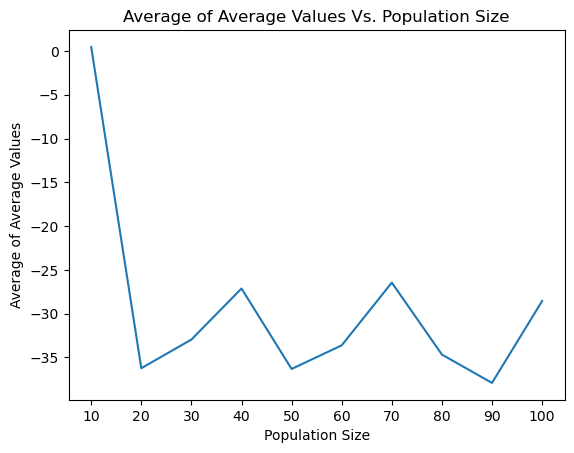

In [4]:
plt.plot(pop_experiments[:, 0], pop_experiments[:, 2])
plt.title("Average of Average Values Vs. Population Size")
plt.xlabel("Population Size")
plt.ylabel("Average of Average Values")
plt.xticks(pop_experiments[:, 0])
plt.show()

We notice a rather interesting pattern here, let's explore what happens with larger population values.

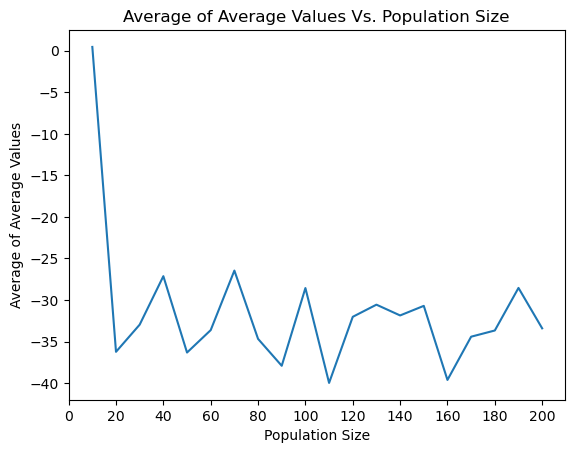

In [5]:
pop_experiments = np.zeros((20, 3))
for i in range(0, 20):
    ga.population_size = (i+1) * 10
    best_solutions, best_fitness_values, average_fitness_values = ga.evolve(seed=100)
    pop_experiments[i][0] = ga.population_size
    pop_experiments[i][1] = best_fitness_values.min()
    pop_experiments[i][2] = average_fitness_values.mean()
plt.plot(pop_experiments[:, 0], pop_experiments[:, 2])
plt.title("Average of Average Values Vs. Population Size")
plt.xlabel("Population Size")
plt.ylabel("Average of Average Values")
plt.xticks((range(0, 201, 20)))
plt.show()

Interestingly, we find that the best population size is 110.Though it is worth mentioning that the other parameters may affect this, but in the interest of saving time, let's assume that 110 is the best. It is also worth mentioning that picking such a value based on the fact the average of averages are lower means that we are sacrificing genetic diversity here, as it means that the averages tend towards the minimum, hence more members of this population are "highly fit" individuals.

Let's move on to the mutation rate, which will be quite interesting, let's test a range of values ranging from 0 to 1, in steps of 0.05.

In [6]:
ga.population_size = 110

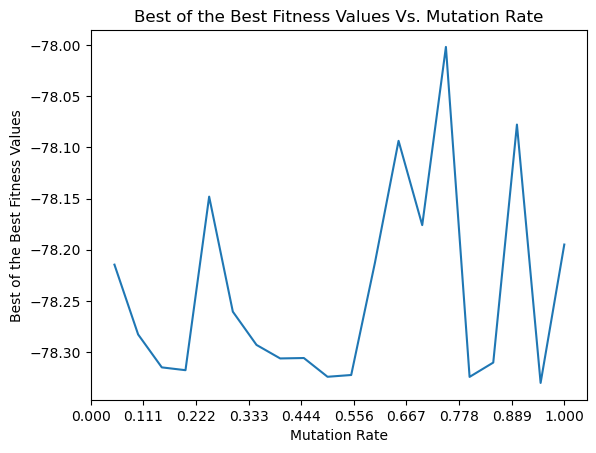

In [7]:
for i in range(0, 20):
    ga.mutation_rate = (i+1)*0.05
    best_solutions, best_fitness_values, average_fitness_values = ga.evolve(seed=100)
    pop_experiments[i][0] = ga.mutation_rate
    pop_experiments[i][1] = best_fitness_values.min()
    pop_experiments[i][2] = average_fitness_values.mean()
plt.plot(pop_experiments[:, 0], pop_experiments[:, 1])
plt.title("Best of the Best Fitness Values Vs. Mutation Rate")
plt.xlabel("Mutation Rate")
plt.ylabel("Best of the Best Fitness Values")
plt.xticks(np.linspace(0, 1, 10))
plt.show()

In general, the mutation rate is highly related to the crossover rate, in the sense that if you have a high crossover rate, it's a good idea to have a low mutation rate, and vise versa. Thus there exists an inverse relationship between mutation and crossover rate. If the crossover rate is low and not many parents crossover, then it is a good idea to have a high mutation rate such that newer solutions can be generated. However, if the crossover rate is relatively high, then we would like for the mutation rate to be low, as a good solution will come as a result of good parents. Given that the mutation rate is high, then the good solutions would be disturbed.

Next, let's the average of averages:

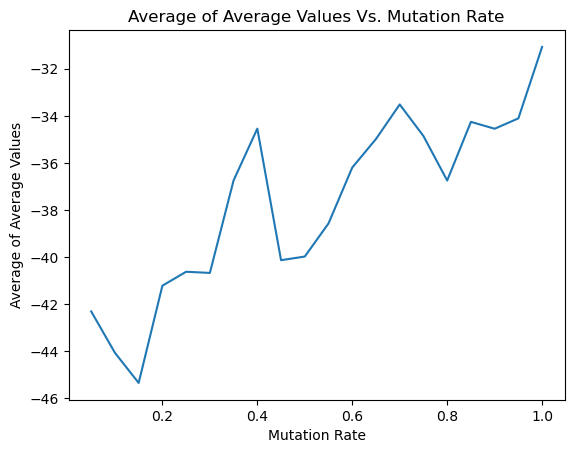

In [8]:
plt.plot(pop_experiments[:, 0], pop_experiments[:, 2])
plt.title("Average of Average Values Vs. Mutation Rate")
plt.xlabel("Mutation Rate")
plt.ylabel("Average of Average Values")
plt.show()

Interesting! We notice that there's a general trend upwards in the averages when the mutation rate goes up, indicating that there are worse and worse solutions in the population, despite that, good solutions still exist, as we saw in the previous graph. Let's select 0.1 as our value for crossover rate, in order to leave some leg-room for playing around with other values. 

Let's now move on experimenting with the strength scale, which affects the magnitude of the mutation.

In [9]:
ga.mutation_rate = 0.1

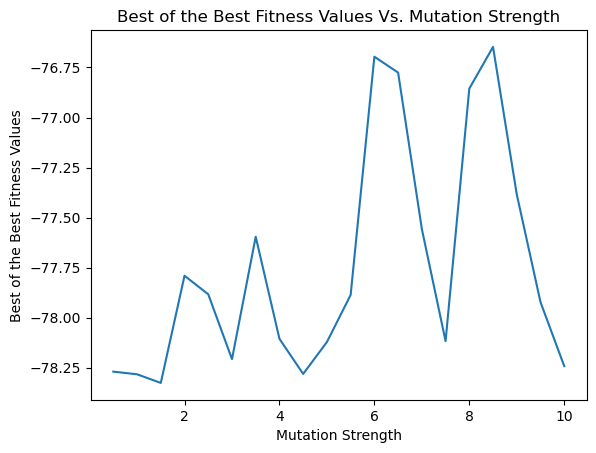

In [10]:
pop_experiments = np.zeros((20, 3))
for i in range(0, 20):
    ga.mutation_strength = (i+1) * 0.5
    best_solutions, best_fitness_values, average_fitness_values = ga.evolve(seed=100)
    pop_experiments[i][0] = ga.mutation_strength
    pop_experiments[i][1] = best_fitness_values.min()
    pop_experiments[i][2] = average_fitness_values.mean()
plt.plot(pop_experiments[:, 0], pop_experiments[:, 1])
plt.title("Best of the Best Fitness Values Vs. Mutation Strength")
plt.xlabel("Mutation Strength")
plt.ylabel("Best of the Best Fitness Values")
plt.show()

It seems like there is a lot of promise in the range (0,1], let's explore that further:

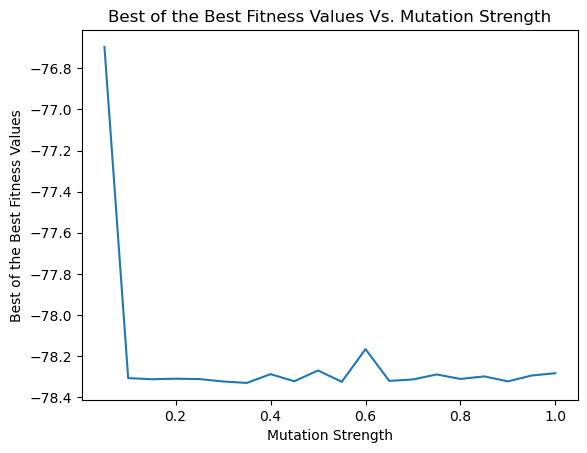

In [11]:
pop_experiments = np.zeros((20, 3))
for i in range(0, 20):
    ga.mutation_strength = (i+1) * 0.05
    best_solutions, best_fitness_values, average_fitness_values = ga.evolve(seed=100)
    pop_experiments[i][0] = ga.mutation_strength
    pop_experiments[i][1] = best_fitness_values.min()
    pop_experiments[i][2] = average_fitness_values.mean()
plt.plot(pop_experiments[:, 0], pop_experiments[:, 1])
plt.title("Best of the Best Fitness Values Vs. Mutation Strength")
plt.xlabel("Mutation Strength")
plt.ylabel("Best of the Best Fitness Values")
plt.show()

To get the bigger picture, Let's take a look at the average of averages, and see what the behavior is there:

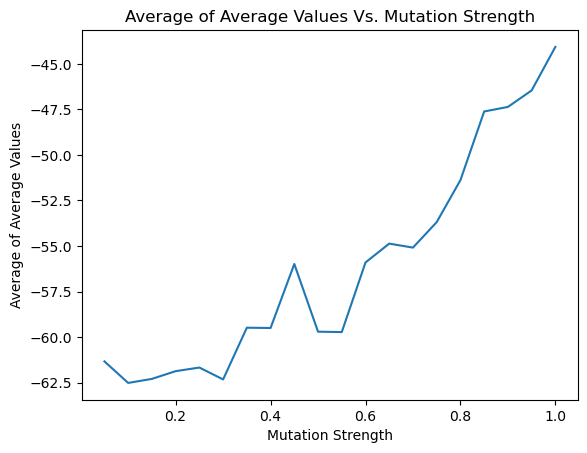

In [12]:
plt.plot(pop_experiments[:, 0], pop_experiments[:, 2])
plt.title("Average of Average Values Vs. Mutation Strength")
plt.xlabel("Mutation Strength")
plt.ylabel("Average of Average Values")
plt.show()

We notice here that as the mutation strength increases, the Averages increase as well, leading to the same situation as the previous parameter where we end up having a larger number of lower fitness individuals despite still having individuals that have very low fitness values. Let's go back to the previous scale and see how this translates to larger strength scales

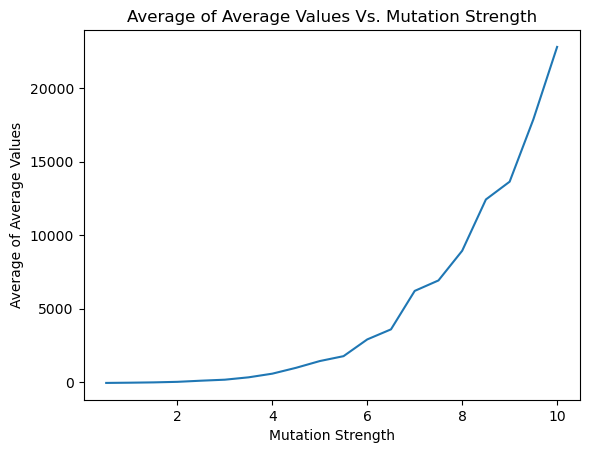

In [13]:
pop_experiments = np.zeros((20, 3))
for i in range(0, 20):
    ga.mutation_strength = (i+1) * 0.5
    best_solutions, best_fitness_values, average_fitness_values = ga.evolve(seed=100)
    pop_experiments[i][0] = ga.mutation_strength
    pop_experiments[i][1] = best_fitness_values.min()
    pop_experiments[i][2] = average_fitness_values.mean()
plt.plot(pop_experiments[:, 0], pop_experiments[:, 2])
plt.title("Average of Average Values Vs. Mutation Strength")
plt.xlabel("Mutation Strength")
plt.ylabel("Average of Average Values")
plt.show()

The upwards trend translates even more extremely to larger mutation strengths!! Let's set the mutation strength to 10, and take a closer look at what the fitness values look like

In [17]:
ga = GeneticAlgorithm(
        population_size=110, # Best value found previously
        mutation_rate=0.1,   # Best value found previously
        mutation_strength=10, # Testing Severity
        crossover_rate=0.5,
        num_generations=10,
)
best_solutions, best_fitness_values, average_fitness_values = ga.evolve(seed=100)
data = np.hstack((best_solutions, best_fitness_values, average_fitness_values))
df = pd.DataFrame(data, columns=["x", "y", "best_fitness_values", "average_fitness_values"])
df


,x,y,best_fitness_values,average_fitness_values
0,-2.931235,-2.836110,-78.242102,11933.783874
1,-2.614210,-2.800184,-76.843676,17821.211829
2,-3.062552,-2.674184,-77.030527,28562.954158
3,-2.276551,-1.994854,-62.627452,38176.441104
4,-1.368120,-2.956547,-55.759290,26636.050169
5,-2.822300,-2.940042,-78.197986,24517.004866
6,-3.145635,-2.321555,-72.465373,16915.222090
7,-2.712570,2.446299,-62.428255,21839.107741
8,-3.086826,-1.666206,-61.070614,13897.775278
9,-2.976812,-1.659986,-61.468868,27742.103430


We notice here that the increase in mutation strength produces horrible average fitness values! This is quite interesting to consider given that the mutation rate here is set to 0.1. With this conclusion, we set the mutation strength to 0.5, considering the averages and best fitness values.

In [18]:
ga.mutation_strength = 0.5

We can now move on to the crossover rate, which will be rather interesting to explore, similar to our mutation rate, this varies from 0 to 1, as such we will explore it in a similar manner, incrementing in steps of 0.05, and explore how the values affect the best of the best fitness values and the average of averages for each run. 

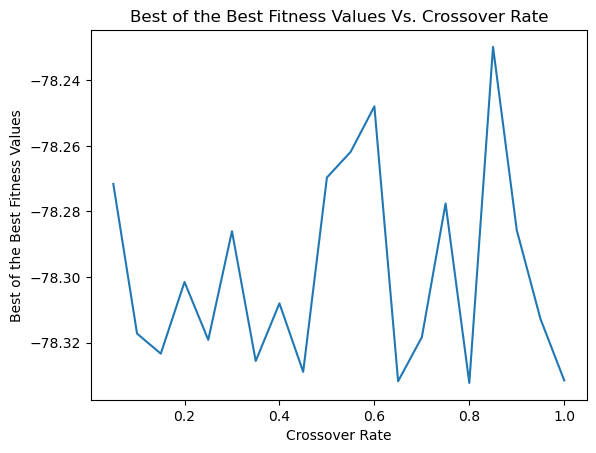

In [19]:
pop_experiments = np.zeros((20, 3))
for i in range(0, 20):
    ga.crossover_rate = (i+1) * 0.05
    best_solutions, best_fitness_values, average_fitness_values = ga.evolve(seed=100)
    pop_experiments[i][0] = ga.crossover_rate
    pop_experiments[i][1] = best_fitness_values.min()
    pop_experiments[i][2] = average_fitness_values.mean()
plt.plot(pop_experiments[:, 0], pop_experiments[:, 1])
plt.title("Best of the Best Fitness Values Vs. Crossover Rate")
plt.xlabel("Crossover Rate")
plt.ylabel("Best of the Best Fitness Values")
plt.show()

The graph looks all over the place, even though our minimums are quite good and their values do not vary wildly, but let's look at the averages to see what we can infer:

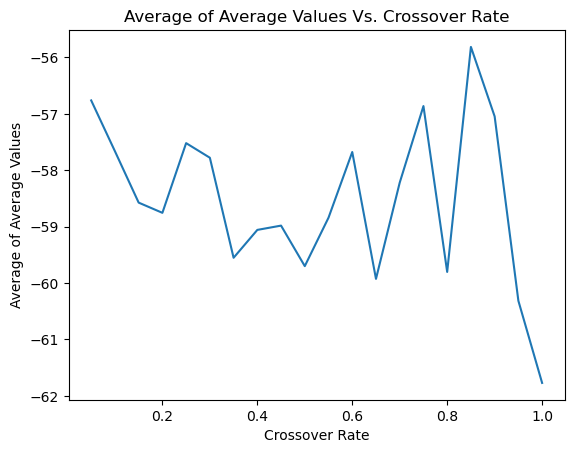

In [20]:
plt.plot(pop_experiments[:, 0], pop_experiments[:, 2])
plt.title("Average of Average Values Vs. Crossover Rate")
plt.xlabel("Crossover Rate")
plt.ylabel("Average of Average Values")
plt.show()

As tempted as we may be to conclude that a value of 1 is the best pick, we need to keep in mind that there is also another parameter to test, mainly number of generations. Given that our number of generations is 10, then naturally a higher crossover rate is preferred, but another thing to keep in mind is that better averages imply lower genetic diversity, as the averages become better (take on lower values), this means that more members of the population have good fitness scores, resulting in the majority of solutions being practically the same.

In this case, let's conclude that a value of 0.5 is rather good, given that it produces averages that imply relatively diverse populations, while still producing a good minimum value of the function. 

In [21]:
ga.crossover_rate = 0.5

Finally, let's take a look at the effect of the number of generations, for this we will take a look at values starting from 10, up to 1000, and explore what our results show.

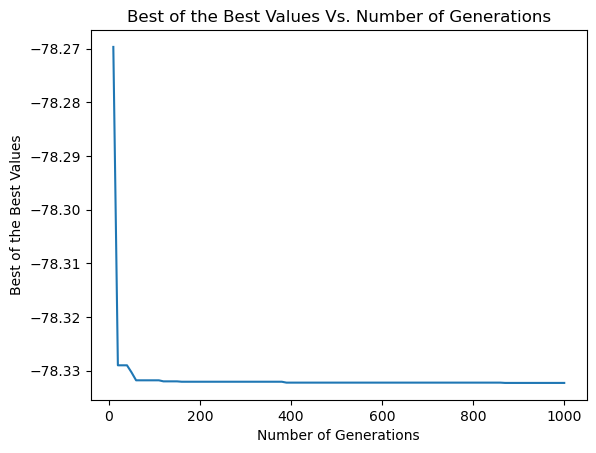

In [22]:
pop_experiments = np.zeros((100, 3))
for i in range(0, 100):
    ga.num_generations = (i+1) * 10
    best_solutions, best_fitness_values, average_fitness_values = ga.evolve(seed=100)
    pop_experiments[i][0] = ga.num_generations
    pop_experiments[i][1] = best_fitness_values.min()
    pop_experiments[i][2] = average_fitness_values.mean()
plt.plot(pop_experiments[:, 0], pop_experiments[:, 1])
plt.title("Best of the Best Values Vs. Number of Generations")
plt.xlabel("Number of Generations")
plt.ylabel("Best of the Best Values")
plt.show()

Here, it can be seen that within 150 generations, we have already reached a good enough value such that higher values have diminishing returns. Let's consider the averages and see what we can learn:

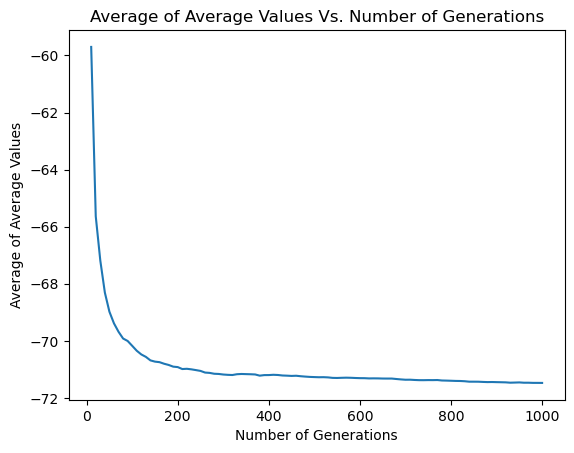

In [23]:
plt.plot(pop_experiments[:, 0], pop_experiments[:, 2])
plt.title("Average of Average Values Vs. Number of Generations")
plt.xlabel("Number of Generations")
plt.ylabel("Average of Average Values")
plt.show()

When it comes to the averages, the progressions is smoother, and this is to be expected given that with more generations, they will slowly begin creeping towards the best values. The rank selection method ensure that even the lowest fitness values still have a chance, but if a population is overcrowded with a high number of very fit individuals (containing solutions that result in fitness values that are very close to the fitness values of the best solution), then it is harder for the lower fitness individuals to be selected.

Let's narrow our scope down to a maximum of 150 generations, and see what we can find:

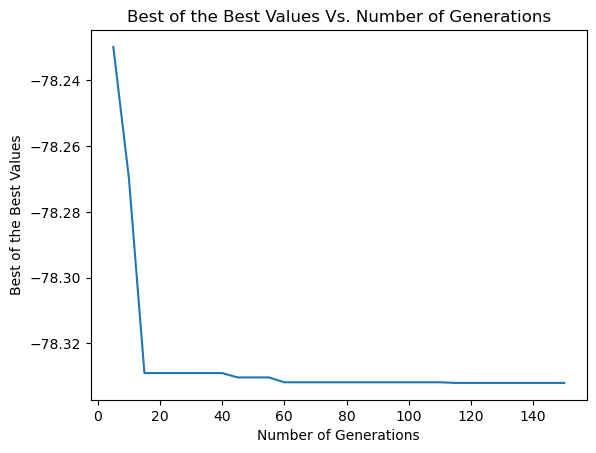

In [24]:
pop_experiments = np.zeros((30, 3))
for i in range(0, 30):
    ga.num_generations = (i+1) * 5
    best_solutions, best_fitness_values, average_fitness_values = ga.evolve(seed=100)
    pop_experiments[i][0] = ga.num_generations
    pop_experiments[i][1] = best_fitness_values.min()
    pop_experiments[i][2] = average_fitness_values.mean()
plt.plot(pop_experiments[:, 0], pop_experiments[:, 1])
plt.title("Best of the Best Values Vs. Number of Generations")
plt.xlabel("Number of Generations")
plt.ylabel("Best of the Best Values")
plt.show()

Looking at the averages we have:

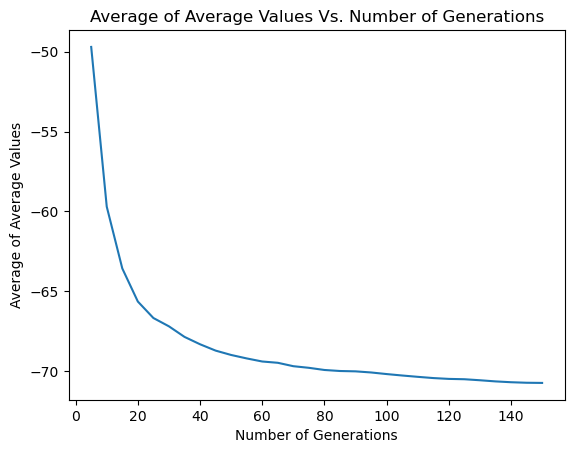

In [25]:
plt.plot(pop_experiments[:, 0], pop_experiments[:, 2])
plt.title("Average of Average Values Vs. Number of Generations")
plt.xlabel("Number of Generations")
plt.ylabel("Average of Average Values")
plt.show()

Combining our observations from both graphs, we can conclude that a generation number of 60 is a good enough value, especially considering the extra computation required with higher number of generations, in fact, lets run our evolution simulation and time how long it takes to complete, and compare to our potential candidate of 60.

In [26]:
from time import time
ga.num_generations = 1000
start_1000 = time()
x, y, z = ga.evolve(seed=100)
end_1000 = time()
ga.num_generations = 60
start_60 = time()
x, y, z = ga.evolve(seed=100)
end_60 = time()
print("1000 Generations:", end_1000-start_1000)
print("60 Generations:", end_60-start_60)



1000 Generations: 0.8311185836791992
60 Generations: 0.049817800521850586


A difference of almost 17 times! (831ms vs 5ms), considering that our problem only has 2 variables, we may not feel it as much, but in a scenario where there are more than just 2 variables, then the computation time starts to have an effect on our execution.

So now, we have concluded that 60 generations is good enough for our purposes. Let's look at what we have determined to be the best parameter values:

In [29]:
parameter_vals = np.array([110, 0.1, 0.5, 0.5, 60])
parameter_vals = parameter_vals.reshape(-1, 5)
parameters = pd.DataFrame(parameter_vals, columns=["Population Size", "Mutation Rate", "Mutation Strength", "Crossover Rate", "Number of Generations"])


# Randomness in Genetic Algorithm

Now we will explore the effect of randomness on the genetic algorith. Previously, we had set the seed to a constant value of 100, in order to explore the best parameter with a "controlled randomness" approach. The seed value ensures that we can repeat subsequent experiments with different parameters, but without changing the randomly generated dataset.

We will experiment with different seed values, and consider the best fitness values, their corresponding solutions, averages and standard deviation.

In [ ]:
seeds = [20, 42, 80, 120, 300]
ga = GeneticAlgorithm()